
# EOSC 213 — Python Workshop III (Vectorization + Plotting)  
**Live coding notebook**

**Goal:** Learn to think in tensors (vectorized code) and visualize 1D/2D functions.

## What you'll practice
- writing vectorized functions (no Python loops over grid points)
- `meshgrid(indexing="xy")`
- `imshow`, `contour`, colorbars, annotations
- a mini-lab: finite-difference gradients on a grid


## 0. Setup (import libraries)

In [18]:

import torch
import time
import matplotlib.pyplot as plt
import math 



## 1) Warm-up: vectorized 1D functions
Plot the function $f_1(x^3 - 3*x)/(1 + x^2)$ between $x=-3$ and $x=3$.

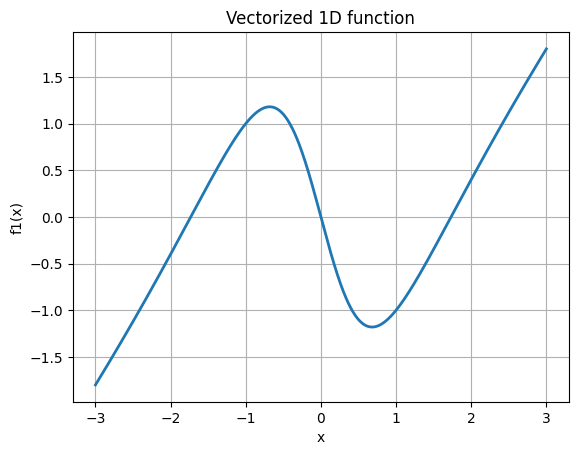

In [19]:

x = torch.linspace(-3, 3, 1000)

# A function
def f1(x):
    return (x**3 - 3*x) / (1 + x**2)

y = f1(x)

plt.figure()
plt.plot(x.numpy(), y.numpy(), linewidth=2)
plt.xlabel("x"); plt.ylabel("f1(x)")
plt.title("Vectorized 1D function")
plt.grid(True)
plt.show()



### ✅ Checkpoint 1a
Create a new vectorized function (no loops):

$f_2(x) = (x^4 + 1)/(1 + 0.5x^2)$

Plot it on the same domain.


In [20]:
# TODO


### ✅ Checkpoint 1b
Create a new vectorized function (no loops):

$f(x, y) = (x^2 + y^2)/\sin(y)$ 

Plot $f(x, y)$ as a function of $x$ for different values of $y = [\pi/10, \pi/6, \pi/4, \pi/3, \pi/2]$. Label $x$ and $y$ axis and plot a legend which describes the plot for different values of $y$. Make sure the fontsizes for axes labels and legend are neither too small nor too big.

In [21]:
# TODO 


## 2) 2D grids with meshgrid


In [26]:

n = 300
x = torch.linspace(-2, 2, n)
y = torch.linspace(-2, 2, n)
X, Y = torch.meshgrid(x, y, indexing="xy")

print("X shape:", X.shape, "Y shape:", Y.shape)


X shape: torch.Size([300, 300]) Y shape: torch.Size([300, 300])



## 3) A 2D polynomial surface

$z(x,y) = (x^2 + y^2)^2 - 4(x^2 - y^2)$


In [27]:

def z_poly(X, Y):
    return (X**2 + Y**2)**2 - 4*(X**2 - Y**2)

Z = z_poly(X, Y)
print("Z min/max:", Z.min().item(), Z.max().item())


Z min/max: -3.9995784759521484 64.0


### 3.1 Visualization: imshow + contour + colorbar

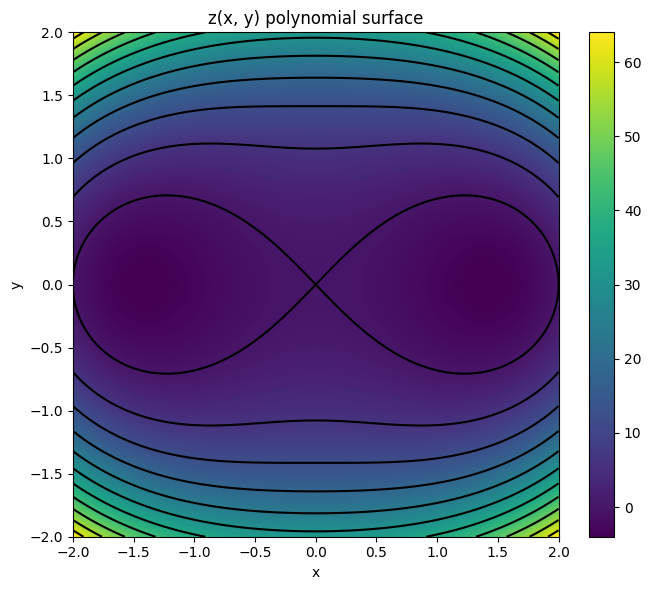

In [44]:
plt.figure(figsize=(7, 6))
im = plt.imshow(Z.numpy(), origin="lower", extent=[x.min(), x.max(), y.min(), y.max()], aspect="auto")
plt.colorbar(im)

plt.contour(X.numpy(), Y.numpy(), Z.numpy(), levels=12, colors="black")

plt.xlabel("x")
plt.ylabel("y")
plt.title("z(x, y) polynomial surface")
plt.tight_layout()
plt.show()



### ✅ Checkpoint 2a
Find and print:
- `Z.max()` and `(x_max, y_max)`
- `Z.min()` and `(x_min, y_min)`

Then mark these points on the plot with `plt.scatter` + labels.

Here, we want you to print **ONLY ONE** of the maxima and minima.


In [ ]:
# TODO 

In [ ]:
# TODO 

### ✅ Checkpoint 2b
Find and print:
- `Z.max()` and `(x_max, y_max)`
- `Z.min()` and `(x_min, y_min)`

Then mark these points on the plot with `plt.scatter` + labels.

Here, we want you to print and plot **ALL** the maxima and minima.

In [ ]:
# TODO 

In [16]:
# TODO 


## 4) A second 2D function (non-smooth + smooth mix) [Do It Yourself]

Plot this function

$z(x,y) = |x| + 2|y| + \frac{1}{1 + x^2 + y^2}$

Call the variable $z$ as `Z2`. 



### ✅ Checkpoint 3 [Do It Yourself]
Compute the index of the minimum of `Z2` and plot it overlayed on the plot of the function.  
Then add a comment explaining why that location makes sense.


In [ ]:
# TODO



## 5) Mini-lab: gradient magnitude by finite differences (2D) [Do It Yourself]

We approximate:

$\frac{\partial z}{\partial x} \approx \frac{z(x+h,y)-z(x-h,y)}{2h},
\quad
\frac{\partial z}{\partial y} \approx \frac{z(x,y+h)-z(x,y-h)}{2h}
$

We'll do it on the grid **without loops** using slicing.


In [ ]:

# Use the smooth polynomial surface for derivatives
n = 200
x = torch.linspace(-2, 2, n)
y = torch.linspace(-2, 2, n)
X, Y = torch.meshgrid(x, y, indexing="ij")
Z = z_poly(X, Y)

h = (x[1] - x[0]).item()

# Central differences (interior points)
dZdx = (Z[2:, 1:-1] - Z[:-2, 1:-1]) / (2*h)
dZdy = (Z[1:-1, 2:] - Z[1:-1, :-2]) / (2*h)

grad_mag = torch.sqrt(dZdx**2 + dZdy**2)

plt.figure(figsize=(7, 6))
im = plt.imshow(grad_mag.numpy(), origin="lower", aspect="auto")
plt.colorbar(im)
plt.title("Gradient magnitude (central differences)")
plt.tight_layout()
plt.show()



### ✅ Checkpoint 4 (hard / optional) [Do It Yourself]
Overlay a few gradient vectors using `plt.quiver`.

Hints:
- Make a smaller grid for arrows (subsample every 10th point)
- You need `dZdx` and `dZdy` at the same subsampled locations
